<h1><center><font color='darkslategrey'>Detecting Phishing Websites Using Machine Learning</font> </center></h1>

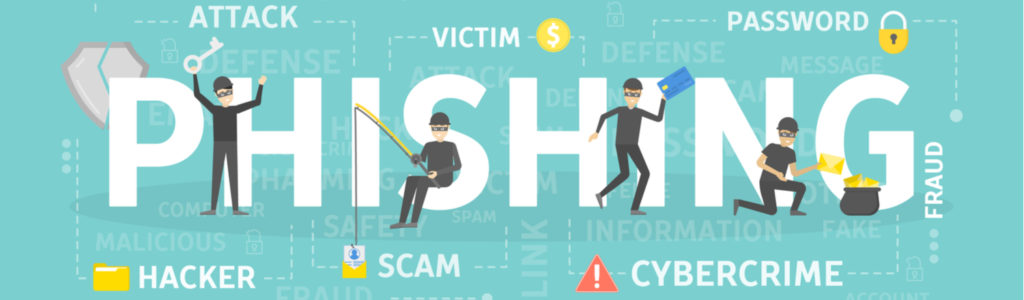

The aim of the experiments conducted in this notebook is to give an idea of how modern <b>phishing website attacks</b> can be prevented using machine learning. To do this, we are going to use the __['Phishing Websites'](https://archive.ics.uci.edu/ml/datasets/phishing+websites)__ Dataset. The viewers are requested to take a look at __[this paper](https://archive.ics.uci.edu/ml/machine-learning-databases/00327/Phishing%20Websites%20Features.docx)__ by the authors of the dataset. The paper discusses the data generation strategy in details and how the authors were able to come up with the most significant set of features for detecting phishing websites.

## Table of Content
1. [Import Libraries](#Import-Libraries)
1. [Data Preprocessing](#Data-Preprocessings)
1. [Data Cleaning](#Data-Cleaning)
1. [Data Visualization](#Data-Visualization)
1. [Model Building](#Model-Building)
1. [Save Model ](#Save-Model )
1. [Conclusion](#Conclusion)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [ ]:
os.getcwd()    #to get current working directory

In [ ]:
dataset = pd.read_csv('../input/dectecting-phishing-website-using-machine-learning/dataset.csv')    # read dataset

dataset.head(5)    # To display 1st 5 obervations

## Data Cleaning 

In [ ]:
dataset.info()    # Information of all dataset

In [ ]:
dataset.isnull().sum()    # For count missing values

In [ ]:
dataset = dataset.drop_duplicates()    # For remove duplicates

In [ ]:
dataset = dataset.drop('index',axis = 1)    # For drop index column

In [ ]:
dataset.head()    # For display top 5 observation

In [ ]:
dataset.head(10).T

In [ ]:
dataset.columns.to_list()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an object of the label encoder class
labelencoder = LabelEncoder()

# Apply labelencoder object on columns
dataset = dataset.apply(labelencoder.fit_transform)

In [ ]:
dataset.head()

## Data Visualization

In [ ]:
sns.set(style="darkgrid")    # To set background
sns.countplot('Result', data = dataset)    # Countplot
plt.title('Class Distribution Plot')    # Title

####  Interpretation 
    Count for Phishing website is maximum.

In [ ]:
from matplotlib.pyplot import show
total = float(len(dataset)) # one person per row 
sns.set(style="darkgrid")

ax = sns.countplot(x="Result",hue = 'SSLfinal_State',data=dataset)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.title('Multiple Bar Plot of SSLfinal_State v/s Result')
show()

In [ ]:
from matplotlib.pyplot import show
total = float(len(dataset)) # one person per row 
sns.set(style="darkgrid")

ax = sns.countplot(x="Result",hue = 'Links_in_tags',data=dataset)    # Countplot

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,          # Loop for calculate percentages for each bar
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    
plt.title('Multiple Bar Plot of Links_in_tags v/s Result')    # Title of plot
show()

In [ ]:
from matplotlib.pyplot import show
total = float(len(dataset)) # one person per row 
sns.set(style="darkgrid")

ax = sns.countplot(x="Result",hue = 'web_traffic',data=dataset)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Multiple Bar Plot of web_traffic v/s Result')    # Title of plot
show()

In [ ]:
from matplotlib.pyplot import show
total = float(len(dataset)) # one person per row 
sns.set(style="darkgrid")

ax = sns.countplot(x="Result",hue = 'URL_of_Anchor',data=dataset)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    
plt.title('Multiple Bar Plot of URL_of_Anchor v/s Result')    # Title of plot
show()

In [ ]:
from matplotlib.pyplot import show
total = float(len(dataset)) # one person per row 
sns.set(style="darkgrid")

ax = sns.countplot(x = "Result",hue = 'having_Sub_Domain',data=dataset)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    
plt.title('Multiple Bar Plot of having_Sub_Domain v/s Result')
show()

In [ ]:
plt.figure()
plt.figure(figsize = (20,40))    # For Figure size

for i in range(1,31):
    sns.set(style = 'darkgrid')
    plt.subplot(11,3,i)    # Create Subplot 
    sns.countplot(dataset.columns[i],data = dataset)   # Create Countplot
    plt.tight_layout()    # For tight graph layout
    
    
plt.title('Distributions of Features')
plt.show()

In [ ]:
data_count = dataset.apply(pd.value_counts)    # For count values

data_count = data_count.T.iloc[:-2, : ]    # For draw last 2 rows

data_count.fillna(0, inplace = True)    # For fill missing value

data_count.style.background_gradient(cmap = 'Blues')    # For background style


## Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import train_test_split    # import train_test_split module

x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,:-1], dataset.iloc[:,-1], test_size = .20, random_state = 7)    # Split dataset into train, test


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

## Classifiers

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier    # import DecisionTreeClassifier

model = DecisionTreeClassifier()    # Call model

model.fit(x_train, y_train)    # Fit model

y_pred = model.predict(x_test)    # Prediction

acc = accuracy_score(y_test, y_pred)    # Accuracy Score
print(acc)

### Logistic Regression

In [ ]:
model = LogisticRegression()    # Call model

model.fit(x_train, y_train)    # Fit model

y_pred = model.predict(x_test)    # Prediction

acc = accuracy_score(y_test, y_pred)    # Accuracy Score
print(acc)

### K Nearest Neighbour

In [ ]:
model = KNeighborsClassifier()    # Call model

model.fit(x_train, y_train)    # Fit model

y_pred = model.predict(x_test)    # Prediction

acc = accuracy_score(y_test, y_pred)    # Accuracy Score
print(acc)

### Navie Baye's

In [ ]:
model = GaussianNB()    # Call model

model.fit(x_train, y_train)    # Fit model

y_pred = model.predict(x_test)    # Prediction

acc = accuracy_score(y_test, y_pred)    # Accuracy Score
print(acc)

### Support Vector Machine

In [ ]:
model = SVC()    # Call model

model.fit(x_train, y_train)    # Fit model

y_pred = model.predict(x_test)    # Prediction

acc = accuracy_score(y_test, y_pred)
print(acc)

### ANN

In [ ]:
model = MLPClassifier()    # Call model

model.fit(x_train, y_train)    # Fit model

y_pred = model.predict(x_test)    # Prediction

acc = accuracy_score(y_test, y_pred)
print(acc)

### Random Forest

In [ ]:
model = RandomForestClassifier()    # Call model

model.fit(x_train, y_train)    # Fit model

y_pred = model.predict(x_test)    # Prediction

acc = accuracy_score(y_test, y_pred)    # Accuracy Score
print(acc)

In [ ]:
pd.DataFrame({'Accuracy' : [0.9647, 0.9376, 0.9570, 0.6296, 0.9611, 0.9656, 0.9756]}, index = ['Decision_Tree', 'Logistic regression',
                                                                                    'K Nearest Neighbour', 'Navie Bayes', 'Support Vector Machine', 'ANN', 'Random Forest']).plot(kind = 'bar')

#### Interpretation

    Random Forect Classifier's Accuracy is better as compare to all other Classifier's Accuracy, So We go with Random Forest Classifier. 

#### Classification Report of Random Forest Classifier

In [ ]:
cr = classification_report(y_test, y_pred, target_names = ['phishing', 'No phishing'])    # Classification Report
print(cr)

#### Confusion Matrix of Random Forest Classifier

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred),cmap = 'Blues', annot = True, fmt = '.2f',)

#### Interpretation
    Here TP(True Positive and TN(True Negative) count is better that means model predicted classes is almost same.

#### ROC Curve of Random Forest Classifier

In [ ]:
roc = plot_roc_curve(model, x_test, y_test)    # Plot Roc Curve
plt.title("ROC Curve")

#### Interpretation
    Here AUC(Area Under Curve) is 1 that emplies our model is best for given dataset.

#### Precision Recall Curve of Random Forest Classifier

In [ ]:
plot_precision_recall_curve(model, x_test, y_test)    # Plot precision recall curve
plt.title("Precision Recall Curve")

#### Interpretation
    Here AP(Average Precision) is 0.99 that is nearly equal to 1 that emplies our model is best for given dataset.

In [ ]:
feature_importance = model.feature_importances_    # Important Features

indices=np.argsort(feature_importance)[::-1]    # Reature importance in descending order
names=[dataset.columns[:-1][i] for i in indices ]     # Rearrange names


plt.figure(figsize=(10,4))    # Set Figure Size
plt.title("Features_Importnace")    # Add title
plt.bar(range(30), feature_importance[indices])    # Create Barplot
plt.xticks(range(30),names,rotation=90)    # Xticks for each Bar
plt.show()

#### Interpretation
    From above barplot we can say that first six features are more important as compare to other features.

## Save Model 

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'Random_Forest.pkl')    # save model

## Advantages
1. This technique provides the phishing webpage detection by hiding the users identity from phishers.
2. The computation time is very less.

## Disadvantages
1. As it provides fake identity of user, the phishers may find out the fake user by consistently analyzing fake response
   from user.
2. Phishers can use CAPTCHA (completely automated public Turing tests to tell computers and humans apart) to intact
   the response of the legitimate user.

## Conclusion
1. From Countplot we say that distribution of Phishing Website is maximum.
2. From all model we say that ANN, SVM, Decision Tree, KNN, Random Forest are good fit but AUc and Precision, Recall for          Random Forest is better than all other Classifiers.
3. Accuracy of Random Forest Classifier is 0.9774
4. Area Under Curve of Random Forest Classifier is 1
5. Average Precision of Random Forest Classifier is 0.99